e Homework 5



In [2]:
# import common
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pylab as plt
from statsmodels.stats import weightstats
from statsmodels.stats import proportion

#### 1. Par사는 골프용품을 생산하는 대기업이다. 기존의 제품에 비해 신제품이 내구성을 향상시키면서 손색없는 비거리를 보일 수 있는 골프공의 생산에 관심이 있다. 두 제품 간의 비거리를 비교하기 위해서 각각 40개의 골프공을 추출하여 비거리를 측정하였다. 비거리의 측정 결과는 golf.csv에 수록되어 있다. 

#### (a) 기존 제품과 신제품 간의 비거리를 비교하는데 활용할 수 있는 가설을 제시하시오.

In [2]:
import matplotlib.pylab as plt
%matplotlib inline
data_path = "../data/"
golf = pd.read_csv(data_path + 'golf.csv')
 # 초 단위로 변환

In [3]:
golf
# tes

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262
5,283,251
6,258,262
7,266,289
8,259,286
9,270,264


In [4]:
golf.describe()

,Current,New
count,40.000000,40.000000
mean,270.275000,267.500000
std,8.752985,9.896904
min,255.000000,250.000000
25%,263.000000,262.000000
50%,270.000000,265.000000
75%,275.250000,274.500000
max,289.000000,289.000000


In [ ]:
# H0 : 신제품의 비거리는 기존제품과 차이가 없음(=)
# H1 : 신제품의 비거리는 기존제품과 차이가 있음(!=)


#### (b) 가설검정을 수행할 수 있도록 자료를 분석하시오. P값은 얼마이며 이 결과에 대하여 Par사에 어떤 자문을 할 수 있겠는가?

In [6]:
len(golf)

40

In [7]:
target = golf.New.mean()
# 표준오차 구하기
n = len(golf)
mean = golf.Current.mean()
std = golf.Current.std()

standard_error = std / (n ** 0.5)
standard_error


1.383968420789864

In [60]:
# 타겟 신뢰수준을 토대로 t값 계산하기
t_value = stats.t.ppf((1+0.95)/2, n-1)
t_value

2.022690911734728

In [61]:
low = mean - t_value * standard_error
low

267.47565965314044

In [62]:
upper = mean + t_value * standard_error
upper

273.0743403468595

In [21]:
print(f"Current는 {low} ~ {upper}의 범위 값을 가지므로 New의 평균 267.5를 포함합니다. 따라서 95% 유의확률에선 귀무가설을 채택하여 새로운 공이 더 좋은 비거리를 가지지 않는다는 결론이 나옵니다")

Current는 267.47565965314044 ~ 273.0743403468595의 범위 값을 가지므로 New의 평균 267.5를 포함합니다. 따라서 95% 유의확률에선 귀무가설을 채택하여 새로운 공이 더 좋은 비거리를 가지지 않는다는 결론이 나옵니다


### Two-sample t-test

In [64]:
# 두개 집단에 대한 평균 비교(two-sample)
golf.New.describe()

count     40.000000
mean     267.500000
std        9.896904
min      250.000000
25%      262.000000
50%      265.000000
75%      274.500000
max      289.000000
Name: New, dtype: float64

In [65]:
golf.Current.describe()

count     40.000000
mean     270.275000
std        8.752985
min      255.000000
25%      263.000000
50%      270.000000
75%      275.250000
max      289.000000
Name: Current, dtype: float64

In [66]:
import pandas as pd
new_data = {'before' : golf.Current, 'after' : golf.New}
new_df = pd.DataFrame(new_data)
new_df

,before,after
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262
5,283,251
6,258,262
7,266,289
8,259,286
9,270,264


<AxesSubplot:>

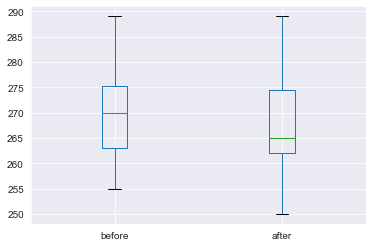

In [67]:
# 두 집단 평균 차이에 대한 검정(two-sample t=test, 독립표본 t검정)
# H0 : 두집단의 평균 차이가 없다
# H1 : 두집단의 평균 차이가 있다
new_df.boxplot()

In [68]:
# 각 집단이 같은지 아닌지를 먼저 확인해야함 (Levene's Test)
stats.levene(new_df.after, new_df.before)

LeveneResult(statistic=0.2553238291765741, pvalue=0.6147759523331309)

In [69]:
print(f"levene's test에 의해 p-value는 0.05보다 높고 이는 유의수준 95%하에서 비거리가 늘어났지 못하다는 결론이 납니다 따라서 H0인 귀무가설을 채택합니다.")

levene's test에 의해 p-value는 0.05보다 높고 이는 유의수준 95%하에서 비거리가 늘어났지 못하다는 결론이 납니다 따라서 H0인 귀무가설을 채택합니다.


In [ ]:
# p value> 0.05 이므로 귀무가설을 기각하지 못한다 따라서 두 집단의 std는 같다고 본다.


#### (c) 각 모델의 모집단 평균에 대한 95% 신뢰구간은 얼마인가? 두 신뢰구간이 겹치는가? 위의 가설검정 결과와 비교하여 서술하시오.

In [70]:
from statsmodels.stats import weightstats
stat_before = weightstats.DescrStatsW(new_df.before)
stat_after = weightstats.DescrStatsW(new_df.after)

In [71]:
stat_after.tconfint_mean()

(264.3348164103898, 270.6651835896102)

In [72]:
stat_before.tconfint_mean()

(267.47565965314044, 273.0743403468595)

In [ ]:
# Q1 . (b)결과를 비교해서 어떤 것을 알아야 하나요??
print(f"신뢰구간은 겹치는 부분이 존재하며 이를통해 비거리가 늘어나지 않는다는 귀무가설을 채택할 수 있다.")

#### 2. 고혈압 환자 120명을 대상으로 치료 전후의 혈압이 blood_pressure.csv에 저장되어 있다. 해당 치료가 효과가 있는지 (즉, 치료 후의 혈압이 감소했는지) 가설검정 절차를 통해 답하시오.

In [22]:
import matplotlib.pylab as plt
%matplotlib inline
data_path = "../data/"
blood = pd.read_csv(data_path + 'blood_pressure.csv')
 # 초 단위로 변환

In [23]:
blood

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141
...,...,...,...,...,...
115,116,Female,60+,152,152
116,117,Female,60+,161,152
117,118,Female,60+,165,174
118,119,Female,60+,149,151


In [73]:
# 해당 분포가 정규분포를 따른다(귀무가설)
a = stats.shapiro(blood.bp_before)
b = stats.shapiro(blood.bp_after)
print(a,b)
# 정규분포를 따르지 않는다(p-value < 0.05) 그러나 관측수가 120개(n>30)이므로 t- test를 진행한다.


ShapiroResult(statistic=0.9547787308692932, pvalue=0.0004928423441015184) ShapiroResult(statistic=0.9740639328956604, pvalue=0.020227791741490364)


In [74]:

stat_before = weightstats.DescrStatsW(blood.bp_before)
stat_after = weightstats.DescrStatsW(blood.bp_after)
# 데이터 평균을 통한 양측검정(유의수준 0.05)의 값 표시
print(stat_before.tconfint_mean(), stat_after.tconfint_mean())

(154.39119937472915, 158.50880062527082) (148.7956209132003, 153.92104575346633)


In [75]:
# 점추정의 경우 이렇게한다.(after 평균에 대한 점추정이 유효한것인가에 대한 결과 표시)
t_result = stat_before.ttest_mean(stat_after.mean, alternative='two-sided')
print('T_statistics: %.3f, p-value: %.3f, degrees of freedom: %i' %(t_result))

T_statistics: 4.897, p-value: 0.000, degrees of freedom: 119


In [76]:
dir(t_result)

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'count',
 'index']

In [77]:
# 두개 집단에 대한 평균 비교
blood.bp_after.describe()

count    120.000000
mean     151.358333
std       14.177622
min      125.000000
25%      140.750000
50%      149.500000
75%      161.000000
max      185.000000
Name: bp_after, dtype: float64

In [78]:
blood.bp_before.describe()

count    120.000000
mean     156.450000
std       11.389845
min      138.000000
25%      147.000000
50%      154.500000
75%      164.000000
max      185.000000
Name: bp_before, dtype: float64

In [80]:
new_data = {'before' : blood.bp_before, 'after' : blood.bp_after}
new_df = pd.DataFrame(new_data)
new_df

,before,after
0,143,153
1,163,170
2,153,168
3,153,142
4,146,141
...,...,...
115,152,152
116,161,152
117,165,174
118,149,151


<AxesSubplot:>

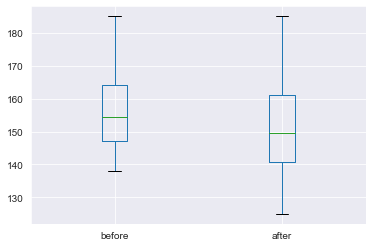

In [81]:
# 두 집단 평균 차이에 대한 검정(two-sample t=test, 독립표본 t검정)
# H0 : 두집단의 평균 차이가 없다
# H1 : 두집단의 평균 차이가 있다
new_df.boxplot()

In [82]:
# 각 집단이 같은지 아닌지를 먼저 확인해야함 (Levene's Test)
stats.levene(new_df.after, new_df.before)

LeveneResult(statistic=4.863729003161597, pvalue=0.028383666362347747)

In [83]:
# p value< 0.05 이므로 귀무가설을 기각한다 따라서 각 집단의 std는 다르다고 보면 된다. usevar = "unequal" 옵션을 선택해야함
weightstats.ttest_ind(new_df.after, new_df.before, usevar='unequal', alternative='two-sided')


(-3.066983681903628, 0.002424249319761932, 227.43679382724363)

In [84]:
# p- value< 0.05 이므로 귀무가설을 기각하고 대립가설을 채택한다 곧, 상기 1번 문제와 박스플롯은 비슷할 수 있으나 분산을 고려하였을 때 이 자료는 약의 효과가 의미가 있다고 귀무가설을 대립하고 대립가설을 채택하게 된다.

#### 3.	시카고 O’Hare 공항과 애틀란타의 Hartsfield-Jackson공항은 미국에서 가장 번잡한 공항들 중에 하나이다. 이렇게 붐비는 관계로 종종 도착과 이륙 지연이 발생한다. 예정보다 15분 지체되면 지연으로 고려된다. 시카고 O’Hare공항은 지난 달 900편 중 252편이 이륙지연되었고 애틀란타의 Hartsfield-Jackson공항은 1200편 중 312편이 이륙지연 되었다. 두 공항의 출발지연에 대한 모집단 비율의 차이가 있는지 판단하기 위해 가설검정을 진행하시오.

In [77]:
# # 두개 집단에 대한 평균 비교
# O_n = 900
# H_n = 1200
#
#
# blood.bp_before.describe()
# new_data = {'before' : blood.bp_before, 'after' : blood.bp_after}
# new_df = pd.DataFrame(new_data)
# new_df
# # 두 집단 평균 차이에 대한 검정(two-sample t=test, 독립표본 t검정)
# # H0 : 두집단의 평균 차이가 없다
# # H1 : 두집단의 평균 차이가 있다
# new_df.boxplot()
# # 각 집단이 같은지 아닌지를 먼저 확인해야함 (Levene's Test)
# stats.levene(new_df.after, new_df.before)
# # p value< 0.05 이므로 귀무가설을 기각한다 따라서 각 집단의 std는 다르다고 보면 된다. usevar = "unequal" 옵션을 선택해야함
# weightstats.ttest_ind(new_df.after, new_df.before, usevar='unequal', alternative='two-sided')
#
# # p- value< 0.05 이므로 귀무가설을 기각하고 대립가설을 채택한다 곧, 상기 1번 문제와 박스플롯은 비슷할 수 있으나 분산을 고려하였을 때 이 자료는 약의 효과가 의미가 있다고 귀무가설을 대립하고 대립가설을 채택하게 된다.

count    120.000000
mean     151.358333
std       14.177622
min      125.000000
25%      140.750000
50%      149.500000
75%      161.000000
max      185.000000
Name: bp_after, dtype: float64

In [1]:

import numpy as np
from statsmodels.stats.proportion import proportions_ztest
# 지연된 이륙 횟수와 전체 이륙 횟수
delayed_flights = np.array([252, 312])
total_flights = np.array([900, 1200])

# 두 비율의 검정
z_statistic, p_value = proportions_ztest(delayed_flights, total_flights)

# 결과 출력
print("z-통계량:", z_statistic)
print("p-value:", p_value)

# 유의수준 설정 (0.05)
alpha = 0.05

# 가설 검증
if p_value < alpha:
    print("귀무가설 기각: 두 공항의 출발 지연 모집단 비율의 차이가 있다.")
else:
    print("귀무가설 채택: 두 공항의 출발 지연 모집단 비율의 차이가 없다.")


z-통계량: 1.0233315429559044
p-value: 0.30615111466303746
귀무가설 채택: 두 공항의 출발 지연 모집단 비율의 차이가 없다.


#### 4. 올해 초 13주 동안 토요일 저녁 뉴스의 시청률이 MBC방송은 29%, KBS방송은 28%, SBS 방송은25%, 기타 방송사가 18%로 기록되었다. 토요일 저녁 방송 편성이 변경되고 난 다음에 300가구를 선정하여 시청률을 조사한 결과에 따르면 MBC 95가구, KBS 70가구, SBS 89가구, 기타 방송이 46가구를 기록하였다. 유의수준 0.05 하에서 시청률에 변경이 있었다고 할 수 있는지 통계적 판단을 하시오.

In [3]:
# 귀무가설(H0): 토요일 저녁 방송 편성 변경 전과 후의 시청률에 차이가 없다.
# 대립가설(H1): 토요일 저녁 방송 편성 변경 전과 후의 시청률에 차이가 있다.

from scipy.stats import chi2_contingency

# 변경 전 시청률과 변경 후 시청률
households = np.array([95, 70, 89, 46])
broadcaster = np.array([0.29, 0.28, 0.25, 0.18])

# 기대 빈도수 계산
total_households = 300
expected_counts = total_households * broadcaster

# 카이제곱 검정 수행
chi_square_statistic, p_value, _, _ = chi2_contingency(
    np.array([households, expected_counts]))

# 결과 출력
print("카이제곱 통계량:", chi_square_statistic)
print("p-value:", p_value)

# 유의수준 설정 (0.05)
alpha = 0.05

# 가설 검증
if p_value < alpha:
    print("귀무가설 기각: 토요일 저녁 방송 편성 변경 전과 후의 시청률에 차이가 있다.")
else:
    print("귀무가설 채택: 토요일 저녁 방송 편성 변경 전과 후의 시청률에 차이가 없다.")


카이제곱 통계량: 3.4594975755951394
p-value: 0.3260532665762452
귀무가설 채택: 토요일 저녁 방송 편성 변경 전과 후의 시청률에 차이가 없다.


In [4]:
data = [2, 4, 6, 8, 10]

# 평균 계산
mean = sum(data) / len(data)

# 분산 계산
var = sum((i - mean) ** 2 for i in data) / len(data)

# 결과 출력
print("평균: ", mean)
print("분산: ", var)


평균:  6.0
분산:  8.0
